# Lab-5:
## Exercise-1:

> Importing the required libraries:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
sb.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Metadata:
> * 'Date' is presented in a format yyyy-mm-dd, and 'Location' indicates Australian cities where the weather conditions were recorded; <br>
> * 'MinTemp' and 'MaxTemp' stand for minimum and maximum temperature for each day; 'Temp9am' and 'Temp3pm' stand for temperature fixed in the morning and in the evening, measured in degrees Celsius;<br>
> * 'Rainfall', 'RainToday', 'RainTomorrow': these columns are connected, 'Rainfall' is measured in mm, and as we can see from the dataset description, it is considered to be raining if the value of rainfall indicator is 1 mm or more. Just in case, I will check this assumption below;<br>
> * 'Evaporation' is measured in mm;<br>
> * 'Sunshine' stands for duration of bright sunshine in the 24 hours to midnight, measured in hours;<br>
> * 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm' indicate direction (categorical value) and speed of wind (measured in km/h);<br>
> * 'Humidity9am', 'Humidity3pm' indicate humidity, measured in percent;<br>
> * 'Pressure9am', 'Pressure3pm' indicate atmospheric pressure, measured in hectopascals;<br>
> * 'Cloud9am', 'Cloud3pm' seem to indicate cloud level, measured as fraction of sky obscured by cloud;<br>
> * 'RainTomorrow' consists of target values.<br>

In [73]:
data.shape

(145460, 23)

In [74]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### Question-1: Preprocess the data, remove the attributes which were are not useful to predict rain. Also, remove rows with at least one missing value for each of them.

In [75]:
data.drop('Date', axis=1, inplace=True)

In [76]:
data.dropna(inplace=True)

> Splitting Dataset in Categorial and Numerical features

In [77]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype == 'O']
numerical_features = [column_name for column_name in data.columns if data[column_name].dtype != 'O']
data_cat = data[categorical_features]
data_num = data[numerical_features]

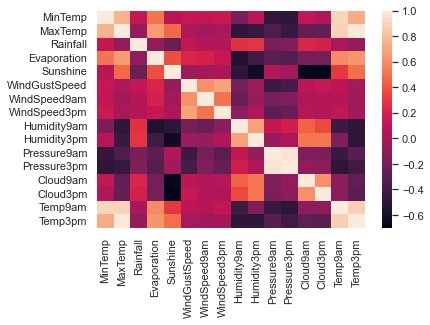

In [78]:
data.isna().sum()
hm = sb.heatmap(data=data.corr())

> Split dataset into X and Y

In [79]:
target = data.pop('RainTomorrow')

In [80]:
mapping = {'No': 0, 'Yes': 1}
target = target.map(mapping)

#### Question-2: Calculate  the  Variance  Inflation  Factor  (VIF)  value.  VIF  is  a  number  that determines whether a variable has multicollinearity or not (starts from 1, and it has  no  upper  limit.  If  the  number  gets  larger,  it  means  the  variable  has  huge multicollinearity on it.). 

In [81]:
lr = LinearRegression()
vif = {}
for col in numerical_features:
    all_cols = list(numerical_features)
    all_cols.remove(col)
    X = data_num[all_cols]
    y = data_num[col]
    lr.fit(X, y)
    y_pred = lr.predict(X)
    score = r2_score(y, y_pred)
    vif[col] = 1 / (1 - score)
    
vif

{'MinTemp': 10.770219691409892,
 'MaxTemp': 46.78406795924843,
 'Rainfall': 1.1779953082896788,
 'Evaporation': 2.22481528634829,
 'Sunshine': 3.307730755606258,
 'WindGustSpeed': 2.8788643484723133,
 'WindSpeed9am': 1.8564893477202455,
 'WindSpeed3pm': 2.1463942950501775,
 'Humidity9am': 4.417547175413456,
 'Humidity3pm': 6.803333309913033,
 'Pressure9am': 19.876241743158516,
 'Pressure3pm': 19.86913652734502,
 'Cloud9am': 2.2382633768389075,
 'Cloud3pm': 2.2774283640218855,
 'Temp9am': 24.36887019910182,
 'Temp3pm': 56.08268800345133}

#### Question-3: Remove multicollinearities by creating new features. Find the features that have paired values and create the new feature which is the difference value between those pairs.

> Correlation Matrix

In [82]:
data_num.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245


In [83]:
numerical_cols = list(numerical_features)
numerical_cols.remove('Cloud9am')
numerical_cols.remove('Cloud3pm')
numerical_cols.remove('WindGustSpeed')
numerical_cols.remove('WindSpeed3pm')
numerical_cols.remove('WindSpeed9am')

**Conclusion from the Above Correlation Matrix**
* Considering variables that have correlation more than 0.6
* WindGustSpeed, WindSpeed3pm
* WindGustSpeed, WindSpeed9am
* Cloud9am, Cloud3pm

> Removing Multicollinearity from the dataset

In [84]:
df_num = data[numerical_cols]
df_num['Cloud9am - Cloud3pm'] = data['Cloud9am'] - data['Cloud3pm']
df_num['WindGustSpeed - WindSpeed3pm'] = data['WindGustSpeed'] - data['WindSpeed3pm']
df_num['WindGustSpeed - WindSpeed9am'] = data['WindGustSpeed'] - data['WindSpeed9am']
df_num.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Cloud9am - Cloud3pm,WindGustSpeed - WindSpeed3pm,WindGustSpeed - WindSpeed9am
6049,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,26.6,33.4,-3.0,28.0,42.0
6050,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,20.3,27.0,0.0,18.0,18.0
6052,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,28.7,34.9,-5.0,31.0,16.0
6053,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,29.1,35.6,-4.0,25.0,25.0
6054,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,33.6,37.6,-5.0,22.0,18.0


In [85]:
temp_df = pd.merge(df_num, data_cat, left_index = True, right_index = True)
temp_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Cloud9am - Cloud3pm,WindGustSpeed - WindSpeed3pm,WindGustSpeed - WindSpeed9am,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,26.6,33.4,-3.0,28.0,42.0,Cobar,SSW,ENE,SW,No,No
6050,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,20.3,27.0,0.0,18.0,18.0,Cobar,S,SSE,SSE,No,No
6052,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,28.7,34.9,-5.0,31.0,16.0,Cobar,NNE,NNE,NNW,No,No
6053,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,29.1,35.6,-4.0,25.0,25.0,Cobar,WNW,WNW,WSW,No,No
6054,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,33.6,37.6,-5.0,22.0,18.0,Cobar,WNW,NW,WNW,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,63.0,32.0,1013.9,1010.5,24.5,32.3,-1.0,15.0,26.0,Darwin,ENE,SE,NE,No,No
142299,21.2,32.6,0.0,7.6,8.6,56.0,28.0,1014.6,1011.2,24.8,32.0,7.0,26.0,24.0,Darwin,E,SE,SE,No,No
142300,20.7,32.8,0.0,5.6,11.0,46.0,23.0,1015.3,1011.8,24.8,32.1,0.0,22.0,16.0,Darwin,E,E,W,No,No
142301,19.5,31.8,0.0,6.2,10.6,62.0,58.0,1014.9,1010.7,24.8,29.2,0.0,9.0,17.0,Darwin,ESE,SE,NNW,No,No


#### Question-4: Remove features that have a VIF value above 5.

In [86]:
drop_cols = [key for key in vif.keys() if vif[key] > 5]
drop_cols

['MinTemp',
 'MaxTemp',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [87]:
df_num.drop(drop_cols, axis=1, inplace=True)

#### Question-5: Build a regression model to perform the Rain prediction. Also, tabulate accuracy of the prediction models, before and VIF computation. 

In [88]:
data_new = pd.get_dummies(temp_df)
data_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
6049,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,26.6,...,0,0,1,0,0,0,1,0,1,0
6050,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,20.3,...,1,0,0,0,0,0,1,0,1,0
6052,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,28.7,...,0,0,0,0,0,0,1,0,1,0
6053,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,29.1,...,0,0,0,0,0,1,1,0,1,0
6054,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,33.6,...,0,0,0,0,1,0,1,0,1,0


In [89]:
data_new = data_new.astype('float64')
target = target.astype('float64')

> Splitting dataset

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size = 0.3, random_state = 42)

> Applying Logistic Regression

In [91]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
accuracy_score(y_test, y_pred)

0.9067115680018906

> The accuracy of the model is approximately 90%